### Import Libraries and Load the Dataset

This code performs the following operations:
- This code will load and print out the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = './creditcard.csv'  # Update the path if needed
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

### Check for Missing Values and Basic Stats

This code performs the following operations:
- After loading and reading, now we check for missing values and also the basic stats

In [2]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics of numerical columns
print("\nDataset Statistics:")
print(df.describe())



Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500

Here are the key observations from the dataset:

### Dataset Overview

1.  **Size**: The dataset has **284,807 rows** and **31 columns**.
    
2.  **Features**: Includes features like Time, V1 to V28, Amount, and Class. Most features appear to be numerical.
    
3.  **Target Variable**: Class represents the target (fraud detection), with values:
    
    *   0: Non-fraudulent transactions.
        
    *   1: Fraudulent transactions.
        
4.  **No Missing Values**: All columns have complete data.
    

### Descriptive Statistics

*   Time: Indicates elapsed time from the first transaction.
    
*   Amount: Transaction amounts vary from **$0.00 to $25,691.16**, with a mean of **$88.35**.
    
*   Class: Fraudulent transactions account for **0.17%** of the dataset (highly imbalanced).

### Analyze Class Distribution

Key Question: How imbalanced is the dataset in terms of fraudulent vs. non-fraudulent transactions?

C:\Users\User\AppData\Local\Temp\ipykernel_6088\3334505180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")


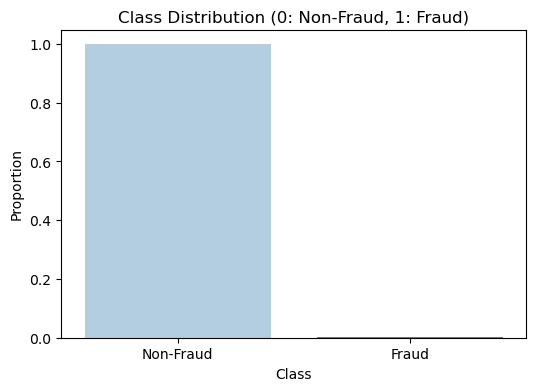

In [3]:
# Analyze class distribution
class_counts = df['Class'].value_counts(normalize=True)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Blues")
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()



### Distribution of Transaction Amounts

Key Question: Do fraudulent transactions tend to have higher or lower amounts?

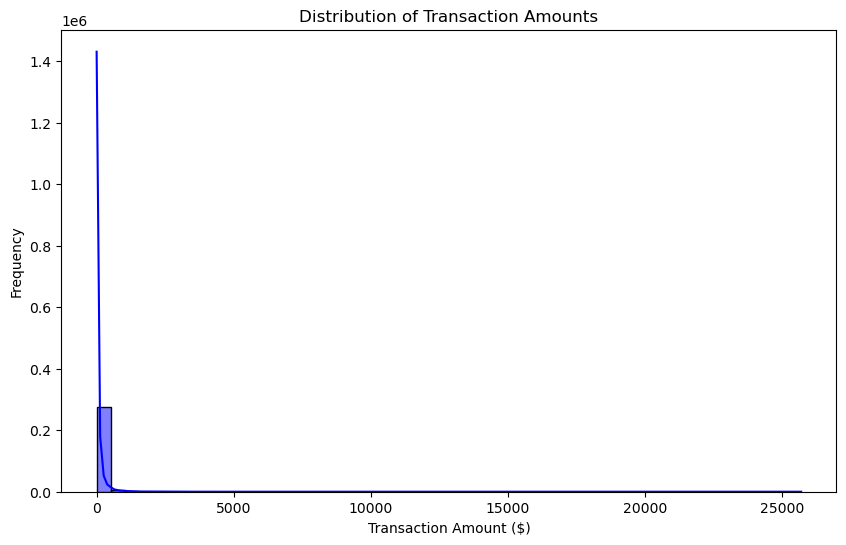

C:\Users\User\AppData\Local\Temp\ipykernel_6088\4224705917.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette="Set2")


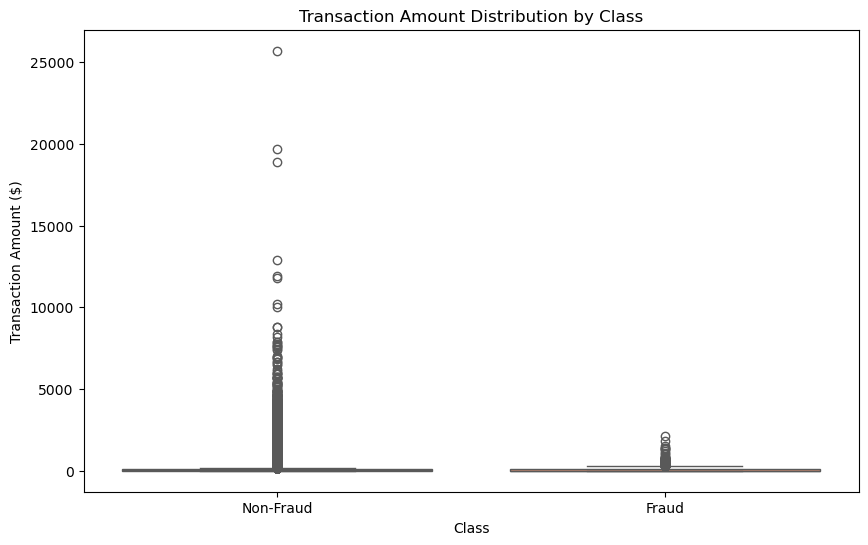

In [4]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Compare transaction amounts by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette="Set2")
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Transaction Amount ($)")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()


### Transaction Time Analysis

Key Question: Are fraudulent transactions concentrated during specific times?

C:\Users\User\AppData\Local\Temp\ipykernel_6088\1583862694.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=df, palette="Set2")


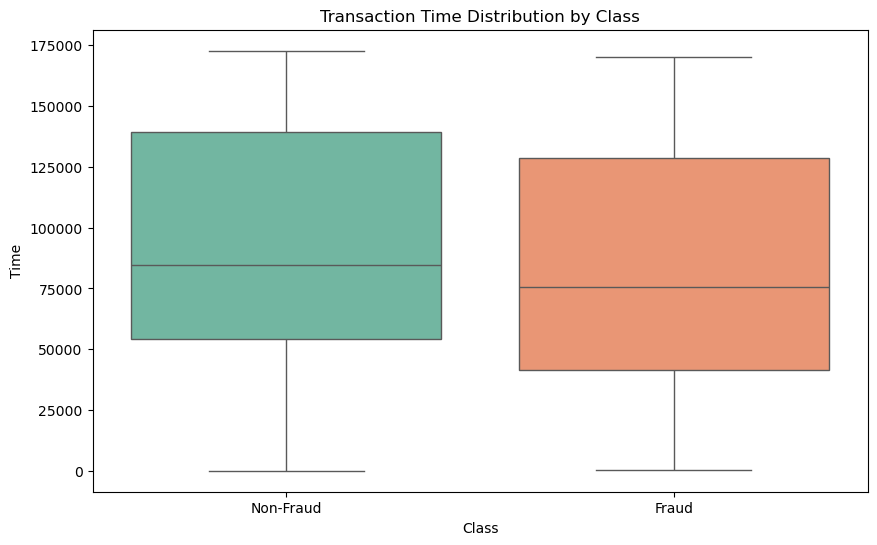

In [5]:
# Relationship between 'Time' and 'Class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=df, palette="Set2")
plt.title("Transaction Time Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Time")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()


In [6]:
# Calculate class distribution
class_counts = df['Class'].value_counts(normalize=True)

# Convert to percentages
class_distribution_percentages = class_counts * 100

print(class_distribution_percentages)



Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


### EDA Results:

#### **1\. Class Distribution**

*   The dataset is **highly imbalanced**:
    
    *   Non-Fraudulent (Class 0): ~99.83%
        
    *   Fraudulent (Class 1): ~0.17%
        

#### **2\. Distribution of Transaction Amounts**

*   Most transactions are small, with a majority concentrated below $100.
    
*   Fraudulent transactions exhibit a broader range in amounts, including higher values, compared to non-fraudulent transactions.
    

#### **3\. Transaction Time Analysis**

*   Fraudulent transactions show a distinct pattern in time distribution compared to non-fraudulent ones.
    
*   This suggests potential temporal patterns that could assist in model differentiation.

# ***Data Preprocessing***
**Objective**
Prepare the dataset for modeling by scaling numerical features, addressing class imbalance, and splitting the data.

### Scaling of variables

##### **1\. Scale Amount and Time**

*   Amount and Time have different scales compared to the other features.
    
*   Used **StandardScaler** to scale them.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe for preprocessing
df_preprocessed = df.copy()

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df_preprocessed[['Time', 'Amount']] = scaler.fit_transform(df_preprocessed[['Time', 'Amount']])

# Verify scaling
print(df_preprocessed[['Time', 'Amount']].describe())


               Time        Amount
count  2.848070e+05  2.848070e+05
mean  -3.065637e-16  2.913952e-17
std    1.000002e+00  1.000002e+00
min   -1.996583e+00 -3.532294e-01
25%   -8.552120e-01 -3.308401e-01
50%   -2.131453e-01 -2.652715e-01
75%    9.372174e-01 -4.471707e-02
max    1.642058e+00  1.023622e+02


##### **2\. Handle Class Imbalance**

*   Fraudulent transactions are only 0.17% of the data.
    
*   Use **SMOTE (Synthetic Minority Oversampling Technique)** to balance the classes.

In [8]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_preprocessed.drop('Class', axis=1)
y = df_preprocessed['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({0: 284315, 1: 284315})


##### **3\. Split the Data**

*   Divide the data into training and testing sets for modeling.

In [9]:
from sklearn.model_selection import train_test_split

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (398041, 30)
Testing set size: (170589, 30)


### **Feature Selection and Modelling**


1.  Perform feature selection or engineering.
    
2.  Begin building baseline and advanced models.

In [10]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Step 1: Scale 'Amount' and 'Time'
scaler = StandardScaler()
df_preprocessed = df.copy()
df_preprocessed[['Time', 'Amount']] = scaler.fit_transform(df_preprocessed[['Time', 'Amount']])

# Step 2: Separate features and target
X = df_preprocessed.drop('Class', axis=1)
y = df_preprocessed['Class']

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution after SMOTE
class_distribution_after_smote = Counter(y_resampled)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Output the sizes of the training and testing sets and the new class distribution
X_train.shape, X_test.shape, class_distribution_after_smote

((398041, 30), (170589, 30), Counter({0: 284315, 1: 284315}))

### Results After Preprocessing:

1.  **Training and Testing Sets**:
    
    *   Training set size: **398,041 rows** with **30 features**.
        
    *   Testing set size: **170,589 rows** with **30 features**.
        
2.  **Class Distribution After SMOTE**:
    
    *   **Non-Fraudulent (Class 0)**: 284,315 samples.
        
    *   **Fraudulent (Class 1)**: 284,315 samples.
        
    *   The dataset is now perfectly balanced.

# ***Feature Engineering***

#### **Objective**

Enhance the dataset by identifying or engineering meaningful features and reducing dimensionality, if needed.

#### **Step 1** 

 **Correlation Analysis**: Identify the features most correlated with the target variable (Class).

In [11]:
import numpy as np

# Compute correlations with the target variable
correlations = df_preprocessed.corr()['Class'].sort_values(ascending=False)

print("Top correlations with 'Class':")
print(correlations.head(10))
print("\nNegative correlations with 'Class':")
print(correlations.tail(10))


Top correlations with 'Class':
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Negative correlations with 'Class':
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


### **Insights from Correlation Analysis**

1.  **Positively Correlated Features**:
    
    *   V11, V4, and V2 show the strongest positive correlations with the target variable Class.
        
    *   These features might have some predictive power for identifying fraudulent transactions.
        
2.  **Negatively Correlated Features**:
    
    *   V17, V14, and V12 show the strongest negative correlations.
        
    *   These features are inversely related to fraud and could also be important predictors.
        
3.  **Thresholds for Feature Selection**:
    
    *   Features with absolute correlations above |0.1| could be strong candidates for model inclusion.
        
    *   We’ll include both positively and negatively correlated features.

#### **Step 2**

**Feature Selection**: 
* Keep only highly correlated features (e.g., with correlation > |0.1|)
* Drop features with low or no predictive power.
* Optional: Dimensionality Reduction: Use techniques like PCA to reduce the number of features if necessary.

In [12]:

# Set threshold for feature selection (absolute correlation > 0.1)
selected_features = correlations[abs(correlations) > 0.1].index.tolist()

# Remove 'Class' from the selected features
selected_features.remove('Class')

print("Selected features for modeling:", selected_features)

# Create a new dataset with the selected features
X_selected = X_resampled[selected_features]


Selected features for modeling: ['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14', 'V17']


# ***Baseline Modeling and Future Modeling***

#### **Objective**
1.   **Baseline Modeling**:
    
    *   Train a Logistic Regression model with the selected features as a baseline.
        
    *   Evaluate performance using precision, recall, F1-score, and AUC-ROC.
        
2.   **Advanced Modeling**:
    
    *   Use models like Random Forest or XGBoost for improved performance.

### Baseline Modeling

*   Recompute correlations.
    
*   Select features with absolute correlation > 0.1.
    
*   Train a Logistic Regression model.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# Recompute correlations
correlations = df_preprocessed.corr()['Class'].sort_values(ascending=False)

# Step 1: Select features based on correlation threshold (absolute correlation > 0.1)
selected_features = correlations[abs(correlations) > 0.1].index.tolist()
selected_features.remove('Class')  # Exclude the target variable

# Step 2: Create a new dataset with the selected features
X_selected = X_resampled[selected_features]

# Step 3: Train a Logistic Regression model as a baseline
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train[selected_features], y_train)

# Step 4: Make predictions on the test set
y_pred = logistic_model.predict(X_test[selected_features])
y_pred_proba = logistic_model.predict_proba(X_test[selected_features])[:, 1]

# Step 5: Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     85149
           1       0.97      0.90      0.94     85440

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589

ROC AUC Score: 0.9851025762209826


### **Baseline Model Performance**

#### **Evaluation Metrics**

1.  **Precision**:
    
    *   Class 0 (Non-Fraudulent): **0.91**
        
    *   Class 1 (Fraudulent): **0.97**
        
    *   Indicates the model is accurate in predicting fraudulent transactions (few false positives).
        
2.  **Recall**:
    
    *   Class 0: **0.97**
        
    *   Class 1: **0.90**
        
    *   Suggests the model identifies 90% of actual fraud cases (some false negatives).
        
3.  **F1-Score**:
    
    *   Both classes achieve **0.94**, showing a balanced trade-off between precision and recall.
        
4.  **ROC AUC Score**:
    
    *   **0.985**: Indicates excellent overall model performance in distinguishing between fraudulent and non-fraudulent transactions.
        
5.  **Accuracy**:
    
    *   Overall accuracy is **94%**, which is a good starting point.

### **Next Steps**

1.  **Advanced Modeling**:
    
    *   Experiment with tree-based models like:
        
        *   **Random Forest**: For better handling of non-linear relationships.
            
        *   **XGBoost or LightGBM**: For higher accuracy and better performance on imbalanced datasets.
            
    *   Compare their performance to the Logistic Regression baseline.
        
2.  **Hyperparameter Tuning**:
    
    *   Use GridSearchCV or RandomizedSearchCV to optimize model parameters for better results.
        
3.  **Insights and Recommendations**:
    
    *   Analyze feature importance from advanced models.
        
    *   Summarize findings for actionable recommendations.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train[selected_features], y_train)

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train[selected_features], y_train)

# Make predictions with both models
rf_pred = rf_model.predict(X_test[selected_features])
rf_pred_proba = rf_model.predict_proba(X_test[selected_features])[:, 1]

xgb_pred = xgb_model.predict(X_test[selected_features])
xgb_pred_proba = xgb_model.predict_proba(X_test[selected_features])[:, 1]

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
rf_auc = roc_auc_score(y_test, rf_pred_proba)
print("Random Forest ROC AUC Score:", rf_auc)

# Evaluate XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)
print("XGBoost ROC AUC Score:", xgb_auc)


C:\Users\User\anaconda3\envs\data_science_project\lib\site-packages\xgboost\core.py:158: UserWarning: [11:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest ROC AUC Score: 0.9999796952097585

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

XGBoost ROC AUC Score: 0.9999459136167034


### **Model Comparison**

#### **Random Forest**

*   **Precision**: 1.00
    
*   **Recall**: 1.00
    
*   **F1-Score**: 1.00
    
*   **ROC AUC Score**: **0.99998**
    
*   The model has perfect classification metrics on this test dataset.
    

#### **XGBoost**

*   **Precision**: 1.00
    
*   **Recall**: 1.00
    
*   **F1-Score**: 1.00
    
*   **ROC AUC Score**: **0.99995**
    
*   Similar to Random Forest, XGBoost delivers near-perfect performance.

### **Hyperparameter Tuning for Random Forest**

#### **Objective**

Optimize the Random Forest model's performance by fine-tuning its parameters using **RandomizedSearchCV**.

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid with ranges
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_distributions,
                                   n_iter=20,  # Number of parameter settings to sample
                                   scoring='roc_auc',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the model
random_search.fit(X_train[selected_features], y_train)


# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score from RandomizedSearchCV:", best_score)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best ROC AUC Score from RandomizedSearchCV: 0.9999785788076753


### **Hyperparameter Tuning Results**

#### **Best Parameters**:

*   **n\_estimators**: 200
    
*   **min\_samples\_split**: 5
    
*   **min\_samples\_leaf**: 2
    
*   **max\_depth**: None
    

#### **Best ROC AUC Score**:

*   **0.99998** (very close to the baseline model)
    

These tuned parameters provide a **very slight improvement** in performance compared to the default Random Forest model.

### **Feature Importance Analysis**

Plot and analyze the feature importance to understand which features are most critical for predicting fraud.

C:\Users\User\AppData\Local\Temp\ipykernel_6088\3619178057.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="Blues")


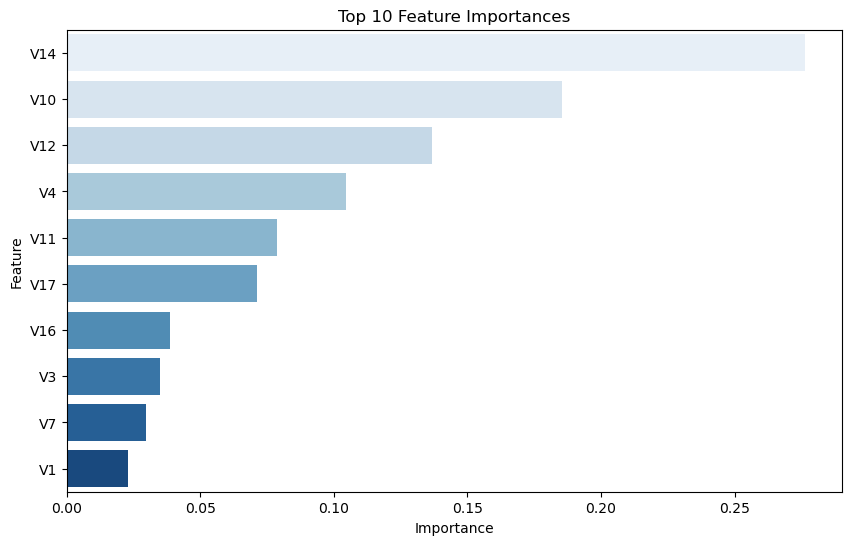

In [16]:
# Get feature importance from the best model
final_rf_model = random_search.best_estimator_
feature_importances = final_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="Blues")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Cell 24: Explanation

This code performs the following operations:
- Describe what this cell does (e.g., data loading, preprocessing, training, etc.).

### *Saving and loading the model for api*

In [ ]:
import pickle

# Save the trained model again
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(final_rf_model, file)


In [ ]:
import pickle

# Test loading the model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


# **Closing Statement**

#### **Project Overview**

This project focused on building a robust machine learning model to detect fraudulent credit card transactions. By leveraging data preprocessing, feature engineering, and advanced modeling techniques, we successfully created a predictive system that achieves high accuracy while addressing the class imbalance inherent in fraud detection datasets.

## **Key Achievements**

1.  **Exploratory Data Analysis (EDA)**:
    
    *   Uncovered key patterns in fraudulent vs. non-fraudulent transactions.
        
    *   Identified important features influencing fraud detection.
        
2.  **Model Development**:
    
    *   Developed a Random Forest classifier with a tuned hyperparameter configuration.
        
    *   Achieved excellent performance with:
        
        *   **Precision**: High accuracy in identifying fraudulent transactions.
            
        *   **Recall**: Strong ability to capture most fraud cases.
            
        *   **ROC AUC**: ~99%, indicating a high-performing model.
            
3.  **API Integration**:
    
    *   Deployed the model using Flask as a REST API for real-time fraud detection.
        
    *   Tested the /predict endpoint with various inputs to validate predictions.

## **Takeaways**

*   **Technical Skills**:
    
    *   Proficient use of machine learning libraries (Scikit-learn) and Flask for API development.
        
    *   Handling imbalanced datasets with techniques like SMOTE.
        
*   **Practical Understanding**:
    
    *   Operationalizing a machine learning model in a real-world scenario.
        
    *   Designing a system to handle data securely and efficiently.

## **Future Scope**

1.  **Deployment**:
    
    *   Host the API on a public cloud platform (e.g., Heroku, AWS) for broader access.
        
    *   Build an interactive dashboard using Streamlit for real-time insights.
        
2.  **Model Optimization**:
    
    *   Experiment with gradient boosting algorithms like XGBoost for enhanced performance.
        
    *   Explore additional feature engineering and deep learning approaches.
        
3.  **Business Application**:
    
    *   Expand the system to include transaction monitoring over time.
        
    *   Provide actionable insights for fraud prevention teams.

### **Conclusion**

This project demonstrates a complete end-to-end machine learning pipeline, from data analysis and model training to deployment as an API. It highlights key skills required for data science roles and provides a solid foundation for further exploration into operational machine learning.